In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import importlib
import cointegration_mult as mult
import Cointegration as coint

importlib.reload(coint)
importlib.reload(mult)

<module 'cointegration_mult' from 'D:\\trades\\pairs_trading_b3\\cointegration_mult.py'>

In [2]:
path_data_cart = 'datasets/data_cart.csv'
path_data_yahoo = 'datasets/data_yahoo.csv'
path_data = 'datasets/data.csv'

In [3]:
data = pd.read_csv(path_data_yahoo, index_col=0)
data = data[::-1]
pairs = pd.read_csv('datasets/cointegrated_pairs_mult.csv')

print('{} to {}'.format(data.index[-1], data.index[0]))
print('data: {}'.format(data.shape))
print('pairs: {}'.format(pairs.shape))

2019-05-02 to 2020-07-09
data: (296, 6)
pairs: (1897, 12)


In [4]:
pairs

,Period,Dependent,Independent,Dickey-Fuller,ADF,Beta,HalfLife,Corr,Signal,SignalStr,PeriodQt,PeriodStr
0,250,ABEV3,AZUL4,0.031658,95,0.117314,9,0.615632,1.172332,Short/Long,2,"100,250"
1,100,ABEV3,B3SA3,0.000085,99,0.228449,2,0.628667,0.108828,Long/Short,1,100
2,250,ABEV3,BBAS3,0.041324,95,0.222135,10,0.551361,0.885949,Short/Long,7,"100,160,180,200,220,240,250"
3,250,ABEV3,BBDC3,0.037843,95,0.341824,11,0.575381,0.946095,Short/Long,8,"100,120,140,160,180,200,220,250"
4,250,ABEV3,BBDC4,0.035837,95,0.350037,11,0.561564,0.830845,Short/Long,9,"100,120,140,160,180,200,220,240,250"
...,...,...,...,...,...,...,...,...,...,...,...,...
1892,250,USIM5,WEGE3,0.017591,95,0.280947,11,0.456577,0.318768,Long/Short,6,"160,180,200,220,240,250"
1893,100,VALE3,VIVT4,0.026121,95,1.221917,5,0.491082,0.116558,Long/Short,1,100
1894,250,VALE3,VVAR3,0.027792,95,1.157682,9,0.537557,0.426913,Short/Long,5,"100,200,220,240,250"
1895,180,VIVT4,VVAR3,0.048437,90,0.648441,7,0.430804,0.405852,Long/Short,5,"100,120,140,160,180"


In [5]:
pairs_signal = pairs.loc[(pairs['Signal'] >= 1) & (pairs['Signal'] <= 1.1)].copy()
pairs_signal.reset_index(drop=True, inplace=True)
pairs_signal.shape

(59, 12)

In [6]:
pairs_signal = pairs_signal.loc[(pairs_signal['PeriodQt'] >= 6) & (pairs_signal['ADF'] == 99)]\
.sort_values(by=['HalfLife'], ascending=True).copy()

pairs_signal.reset_index(drop=True, inplace=True)
pairs_signal

,Period,Dependent,Independent,Dickey-Fuller,ADF,Beta,HalfLife,Corr,Signal,SignalStr,PeriodQt,PeriodStr
0,250,ABEV3,CCRO3,0.000455,99,0.690821,5,0.538201,1.052769,Short/Long,9,"100,120,140,160,180,200,220,240,250"
1,220,GNDI3,MRVE3,0.001694,99,2.895195,5,0.722136,1.034747,Long/Short,7,"100,120,140,160,180,200,220"
2,250,ABEV3,BBSE3,0.001139,99,0.420276,6,0.454599,1.066591,Short/Long,9,"100,120,140,160,180,200,220,240,250"
3,250,ABEV3,HAPV3,0.001166,99,0.208012,6,0.520273,1.012745,Short/Long,9,"100,120,140,160,180,200,220,240,250"
4,250,RENT3,TAEE11,0.000654,99,3.846547,6,0.575320,1.078386,Short/Long,9,"100,120,140,160,180,200,220,240,250"
5,200,LAME4,MGLU3,0.006568,99,0.413097,6,0.810991,1.019537,Long/Short,6,"100,120,140,160,180,200"
6,250,ENBR3,RENT3,0.000784,99,0.258515,6,0.621771,1.011331,Long/Short,9,"100,120,140,160,180,200,220,240,250"
7,250,GOAU4,USIM5,0.006224,99,1.024013,7,0.824486,1.018528,Long/Short,7,"120,160,180,200,220,240,250"
8,250,GOAU4,MRVE3,0.003711,99,0.575945,7,0.653967,1.062155,Long/Short,9,"100,120,140,160,180,200,220,240,250"
9,250,ENGI11,MRVE3,0.004256,99,1.703847,7,0.639156,1.003306,Long/Short,7,"100,160,180,200,220,240,250"


In [7]:
#pairs_signal.to_csv('datasets/sinais/sinais_06072020.csv', index=False)

In [8]:
oper = pairs_signal.loc[(pairs_signal['PeriodQt'] >= 9) & (pairs_signal['ADF'] >= 95) & (pairs_signal['HalfLife'] <= 6)]\
.sort_values(by=['HalfLife'], ascending=True).copy()
oper

,Period,Dependent,Independent,Dickey-Fuller,ADF,Beta,HalfLife,Corr,Signal,SignalStr,PeriodQt,PeriodStr
0,250,ABEV3,CCRO3,0.000455,99,0.690821,5,0.538201,1.052769,Short/Long,9,"100,120,140,160,180,200,220,240,250"
2,250,ABEV3,BBSE3,0.001139,99,0.420276,6,0.454599,1.066591,Short/Long,9,"100,120,140,160,180,200,220,240,250"
3,250,ABEV3,HAPV3,0.001166,99,0.208012,6,0.520273,1.012745,Short/Long,9,"100,120,140,160,180,200,220,240,250"
4,250,RENT3,TAEE11,0.000654,99,3.846547,6,0.575320,1.078386,Short/Long,9,"100,120,140,160,180,200,220,240,250"
6,250,ENBR3,RENT3,0.000784,99,0.258515,6,0.621771,1.011331,Long/Short,9,"100,120,140,160,180,200,220,240,250"


In [9]:
#oper.iloc[[0,1,2]].to_csv('datasets/oper/06072020.csv', index=False)

# Análise das operações abertas

In [10]:
oper_current = pd.read_csv('datasets/oper/06072020.csv')
oper_current

,Period,Dependent,Independent,Dickey-Fuller,ADF,Beta,HalfLife,Corr,Signal,SignalStr,PeriodQt,PeriodStr
0,250,TAEE11,USIM5,0.000012,99,0.893375,4,0.485344,1.091713,Long/Short,9,"100,120,140,160,180,200,220,240,250"
1,250,CSAN3,FLRY3,0.000225,99,2.325672,5,0.647742,1.093688,Short/Long,9,"100,120,140,160,180,200,220,240,250"
2,250,ENGI11,VVAR3,0.000469,99,1.580477,5,0.616080,1.057568,Long/Short,9,"100,120,140,160,180,200,220,240,250"


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


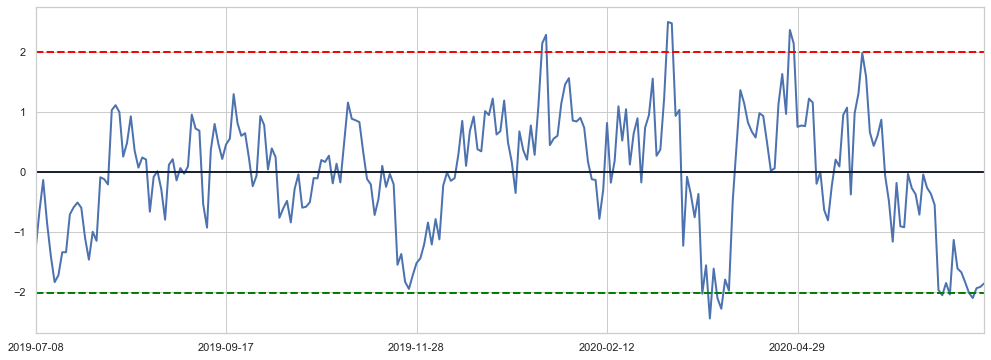

In [11]:
mult.plot_residue(mult.residue(data['TAEE11'], data['USIM5'], 250))

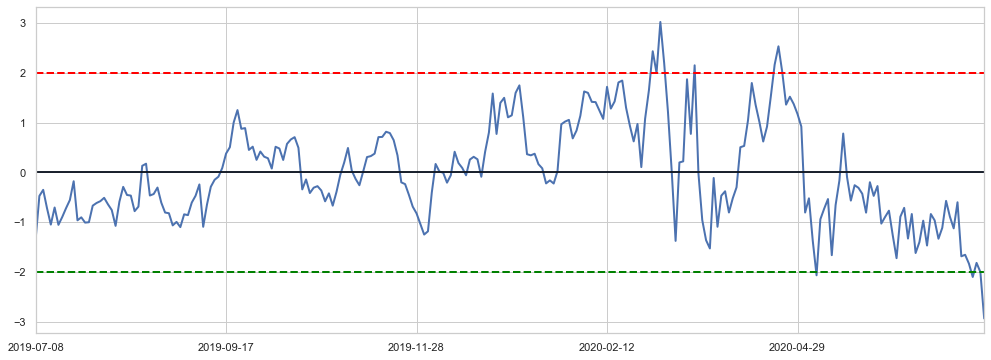

In [12]:
mult.plot_residue(mult.residue(data['ENGI11'], data['VVAR3'], 250))

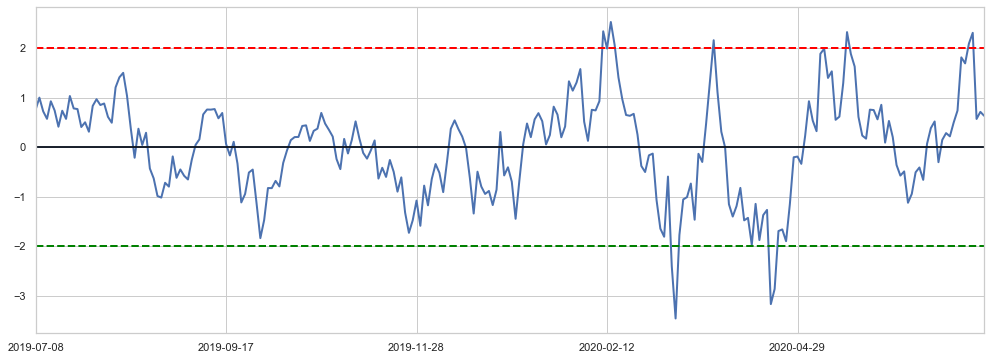

In [13]:
mult.plot_residue(mult.residue(data['CSAN3'], data['FLRY3'], 250))

In [21]:
mult.summary(data, 'ENGI11', 'VVAR3', 250)

Período de Análise                   250   Entrada     Compra: ENGI11 / Venda:VVAR3
Independente                      ENGI11   Dependente                         VVAR3
R$                      47.7400016784668   R$                    17.549999237060547
Volume                               100   Volume                              -154
Finan(ENGI11) R$       -4774.00016784668   Ratio                 2.7202281341217187
Finan(VVAR3) R$        2702.699882507324                                           
=  R$                -2071.3002853393555                                           
Retorno  (%)           8.734566239068098   Gain                   637.3462029308101
Atual    (%)          13.350359876888863   Loss                 -229.34351380258948
Loss     (%)          -4.804011431487554                                           
Dickey Fuller          -4.65848051470352   Meia Vida                              5
ADF                                   99   Correlação  (%)       59.36463131

In [15]:
mult.analysis_by_periods(data['ENGI11'], data['VVAR3'])

,Period,Stationary,Dickey-Fuller,ADF,Beta,HalfLife,Corr
0,100,True,0.000802,99,1.532209,2,0.645297
1,120,True,0.000907,99,1.450994,3,0.645270
2,140,True,0.000506,99,1.448386,3,0.630349
3,160,True,0.000924,99,1.505772,4,0.622263
4,180,True,0.000737,99,1.543109,4,0.617491
5,200,True,0.000184,99,1.545898,4,0.613856
6,220,True,0.000199,99,1.556984,5,0.613940
7,240,True,0.000093,99,1.543743,5,0.600968
8,250,True,0.000101,99,1.543025,5,0.593646
